In [2]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [3]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [7]:
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [48]:
desc_path = os.path.join(dir_data, 'HomeCredit_columns_description.csv')
desc = pd.read_csv(desc_path, engine = 'python', index_col = 0)
desc.head()

,Table,Row,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


### TARGET (1 - client with payment difficulties)
#### 觀察Target 0/1 分佈

In [141]:
target = pd.DataFrame(app_train.TARGET.value_counts())
target['Percent(%)'] = round((target['TARGET']/(target['TARGET'].sum())) * 100, 2)
target

,TARGET,Percent(%)
0,282686,91.93
1,24825,8.07


Text(0.5,1,'Target (0/1) Distrbution')

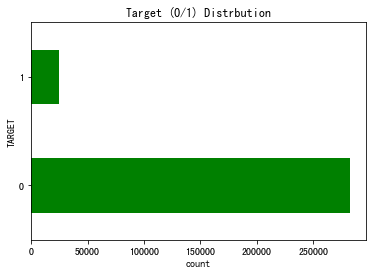

In [153]:
target['TARGET'].plot(kind = 'barh', color = 'g')
plt.ylabel('TARGET')
plt.xlabel('count')
plt.title('Target (0/1) Distrbution')

### EXT_SOURCE_1 ~ 3 (Normalized score from external data source)
#### 觀察三個外部評分的分布狀況 以及 與Target 是否為1之分佈

In [83]:
app_train['EXT_SOURCE_1'].describe()

count    134133.000000
mean          0.502130
std           0.211062
min           0.014568
25%           0.334007
50%           0.505998
75%           0.675053
max           0.962693
Name: EXT_SOURCE_1, dtype: float64

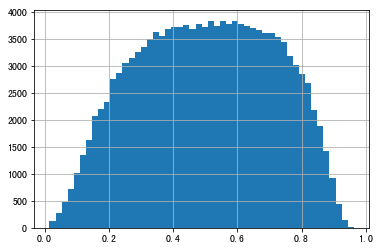

In [84]:
app_train['EXT_SOURCE_1'].hist(bins = 50)

In [214]:
app_train['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

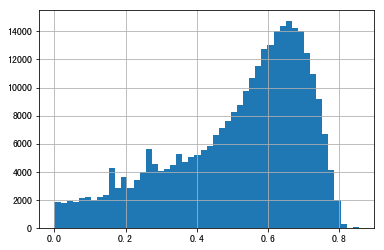

In [166]:
app_train['EXT_SOURCE_2'].hist(bins = 50)

In [215]:
app_train['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

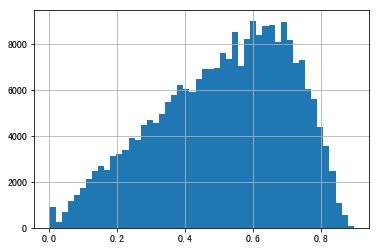

In [167]:
app_train['EXT_SOURCE_3'].hist(bins = 50)

### TARGET vs EXT_SOURCE_1~3 (Normalized score from external data source)
#### TARGET 0/1 客群 其在外部score的分布是否有差異

> Target 0/1 各別與EXT_SOURCE_1、EXT_SOURCE_3有較不一樣的分佈

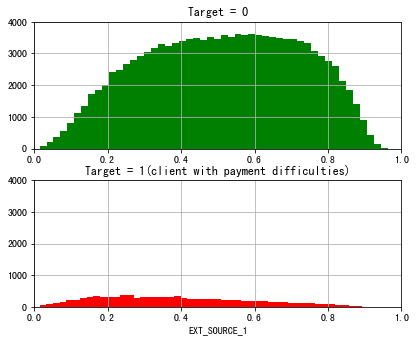

In [127]:
t1 = app_train[app_train['TARGET'] == 1]
t0 = app_train[app_train['TARGET'] == 0]

plt.subplot(2,1,1)
t0['EXT_SOURCE_1'].hist(bins = 50, color = 'g')
plt.xlim(0,1)
plt.ylim(0,4000)
plt.title('Target = 0')


plt.subplot(2,1,2)
t1['EXT_SOURCE_1'].hist(bins = 50, color = 'r')
plt.xlim(0,1)
plt.ylim(0,4000)
plt.title('Target = 1(client with payment difficulties)')
plt.xlabel('EXT_SOURCE_1')

plt.subplots_adjust(top = 1, bottom = 0.01, left = 0.1, right = 0.95, hspace = 0.25, wspace = 0.35)

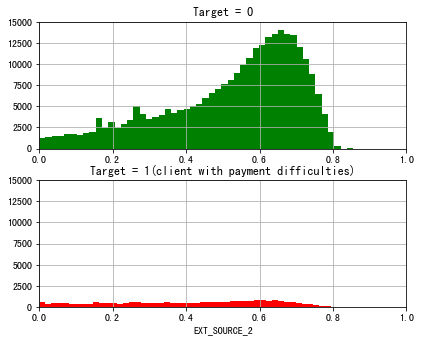

In [161]:
plt.subplot(2,1,1)
t0['EXT_SOURCE_2'].hist(bins = 50, color = 'g')
plt.xlim(0,1)
plt.ylim(0,15000)
plt.title('Target = 0')


plt.subplot(2,1,2)
t1['EXT_SOURCE_2'].hist(bins = 50, color = 'r')
plt.xlim(0,1)
plt.ylim(0,15000)
plt.title('Target = 1(client with payment difficulties)')
plt.xlabel('EXT_SOURCE_2')

plt.subplots_adjust(top = 1, bottom = 0.01, left = 0.1, right = 0.95, hspace = 0.25, wspace = 0.35)

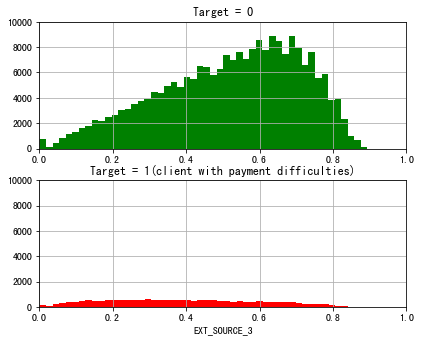

In [164]:
plt.subplot(2,1,1)
t0['EXT_SOURCE_3'].hist(bins = 50, color = 'g')
plt.xlim(0,1)
plt.ylim(0,10000)
plt.title('Target = 0')


plt.subplot(2,1,2)
t1['EXT_SOURCE_3'].hist(bins = 50, color = 'r')
plt.xlim(0,1)
plt.ylim(0,10000)
plt.title('Target = 1(client with payment difficulties)')
plt.xlabel('EXT_SOURCE_3')

plt.subplots_adjust(top = 1, bottom = 0.01, left = 0.1, right = 0.95, hspace = 0.25, wspace = 0.35)

### AMT_INCOME_TOTAL (Income of the client)
#### 觀察收入與Target 0/1是否有不同的分佈
> 發現可能因為是房貸的關係, 因此在申請人的收入上較無明顯的差異分佈

In [170]:
app_train.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [182]:
app_train['AMT_INCOME_TOTAL'].value_counts().head(10)

135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
225000.0    20698
202500.0    16341
67500.0     11147
270000.0    10827
81000.0      6001
Name: AMT_INCOME_TOTAL, dtype: int64

In [187]:
app_train['AMT_INCOME_TOTAL'].max()

117000000.0

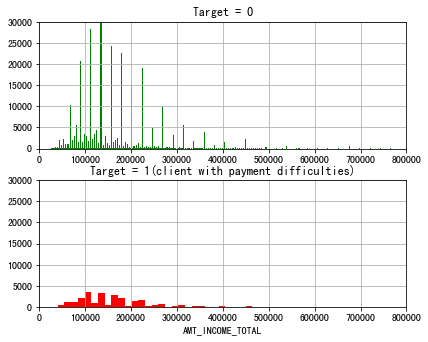

In [212]:
plt.subplot(2,1,1)
t0['AMT_INCOME_TOTAL'].hist(bins = 8000, color = 'g')
plt.ylim(0, 30000)
plt.xlim(0, 800000)
plt.title('Target = 0')


plt.subplot(2,1,2)
t1['AMT_INCOME_TOTAL'].hist(bins = 8000, color = 'r')
plt.ylim(0, 30000)
plt.xlim(0, 800000)
plt.title('Target = 1(client with payment difficulties)')
plt.xlabel('AMT_INCOME_TOTAL')

plt.subplots_adjust(top = 1, bottom = 0.01, left = 0.1, right = 0.95, hspace = 0.25, wspace = 0.35)

### OBS_30_CNT_SOCIAL_CIRCLE / DEF_30_CNT_SOCIAL_CIRCLE /OBS_60_CNT_SOCIAL_CIRCLE / DEF_60_CNT_SOCIAL_CIRCLE

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1e0c4b390>,
      dtype=object)

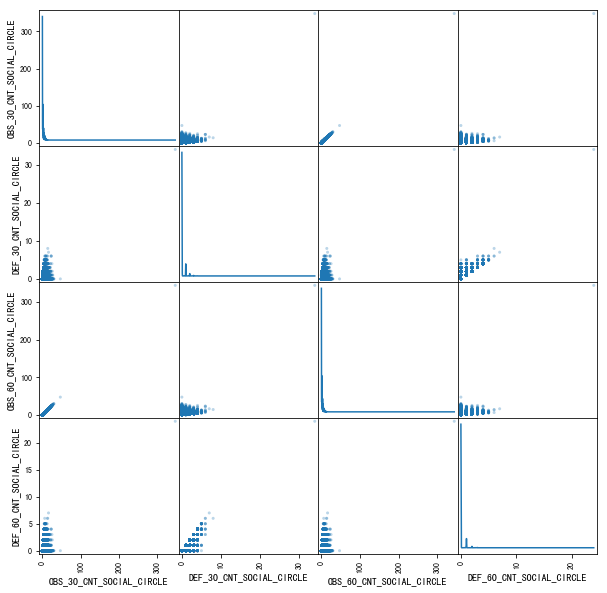

In [169]:
from pandas.tools.plotting import scatter_matrix

enquiries = app_train[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']]

scatter_matrix(enquiries, alpha = 0.3, figsize = (10,10), diagonal='kde')